決定木とランダムフォレスト

In [6]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, Y = make_blobs(n_samples=500, centers =4, random_state=8, cluster_std=2.4)

In [5]:
Y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3,
       3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 3, 1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3,
       0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3,
       2, 0, 3, 2, 3, 3, 1, 0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2,
       3, 3, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2,
       2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1, 0, 3, 3, 0, 1, 2, 0, 0, 0, 2,
       3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3, 0, 3,

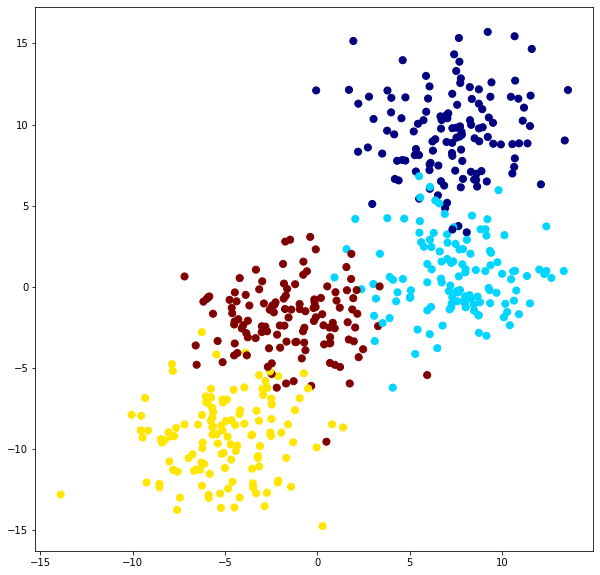

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="jet")

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [14]:
cls = DecisionTreeClassifier(max_depth=2, random_state=0)

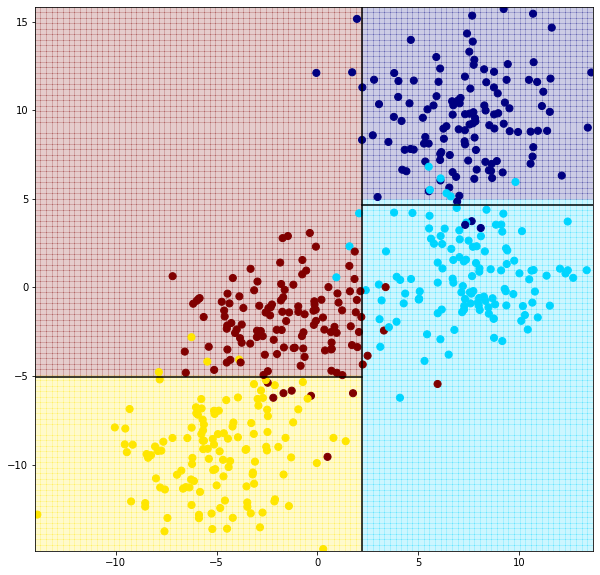

In [15]:
visualize_tree(cls, X, Y)

In [16]:
cls = DecisionTreeClassifier(max_depth=4, random_state=0)

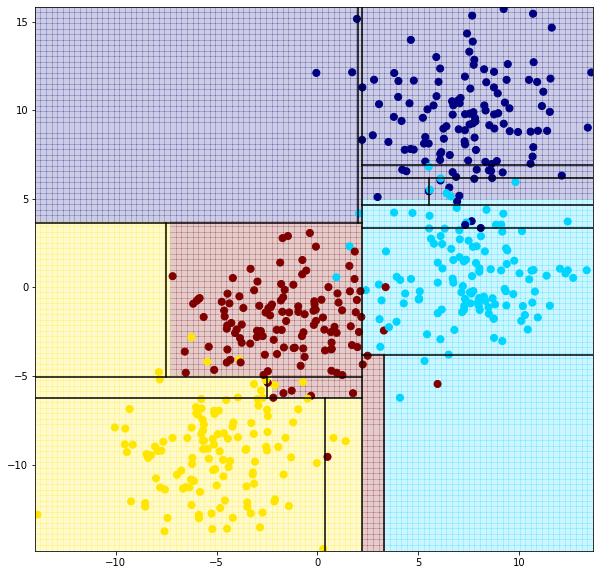

In [17]:
visualize_tree(cls, X, Y)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

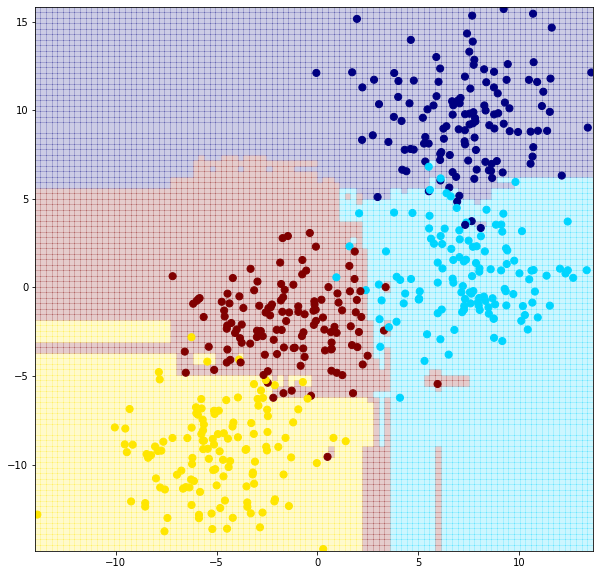

In [21]:
visualize_tree(clf, X, Y, boundaries=False)

In [22]:
from sklearn.ensemble import RandomForestRegressor

<ErrorbarContainer object of 3 artists>

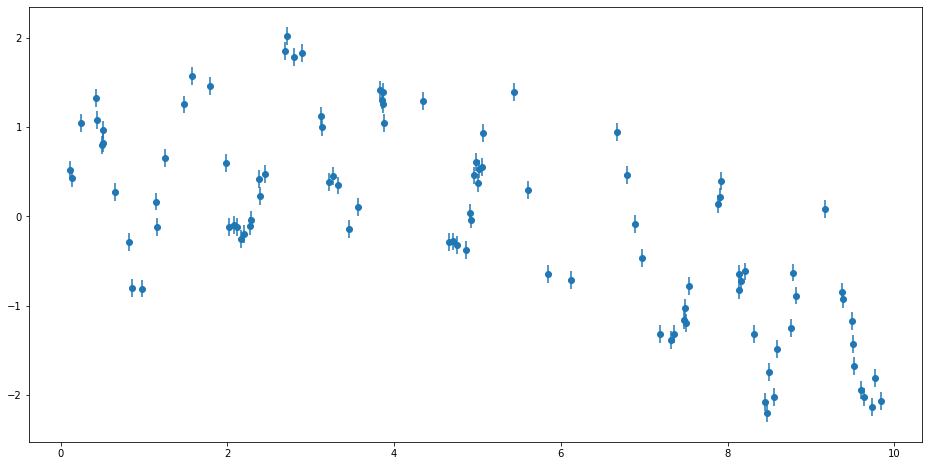

In [23]:
x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# Plotします。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')


In [24]:
xfit = np.linspace(0, 10, 1000)

In [25]:
rfr = RandomForestRegressor(100)

In [26]:
rfr.fit(x[:, None], y)

RandomForestRegressor()

In [27]:
yfit = rfr.predict(xfit[:, None])

In [28]:
yfit

array([ 0.55250565,  0.55250565,  0.55250565,  0.55250565,  0.55250565,
        0.55250565,  0.55250565,  0.55250565,  0.55250565,  0.55250565,
        0.55250565,  0.55250565,  0.50861608,  0.50861608,  0.50861608,
        0.50861608,  0.50861608,  0.50861608,  0.57747584,  0.86687762,
        0.86687762,  0.86687762,  0.86687762,  0.86687762,  0.86687762,
        0.86687762,  0.86687762,  0.89659623,  1.02116708,  1.07937161,
        1.07937161,  1.084972  ,  1.09229356,  1.09229356,  1.1936896 ,
        1.19926393,  1.19926393,  1.19926393,  1.17385048,  1.17385048,
        1.17385048,  1.17385048,  1.17385048,  1.17385048,  1.08148204,
        1.08148204,  1.08148204,  0.82681457,  0.82354538,  0.82354538,
        0.82354538,  0.92327858,  0.92327858,  0.92327858,  0.92327858,
        0.89664174,  0.89664174,  0.89664174,  0.87559252,  0.48475136,
        0.48475136,  0.48475136,  0.48475136,  0.48475136,  0.48475136,
        0.48475136,  0.48475136,  0.21876953,  0.21876953,  0.09

In [29]:
ytrue = sin_model(xfit,0)

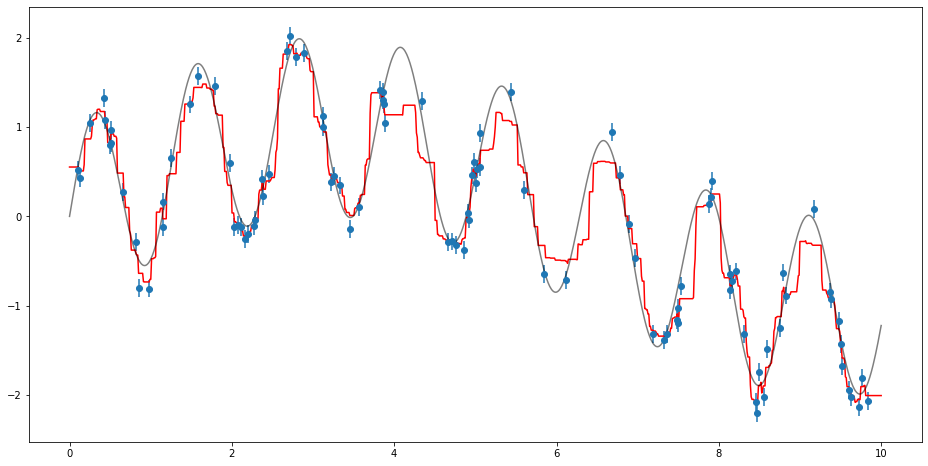

In [32]:
plt.figure(figsize=(16,8))

plt.errorbar(x, y, 0.1, fmt="o")
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha=0.5)